🔧 TRACEFINDER - WEEK 2: Image Preprocessing Pipeline
✅ Libraries imported successfully!

📂 LOADING WEEK 1 DATASET
📁 Project Location: C:\Users\Dell\OneDrive\Desktop\TraceFinder_Project
✅ Loaded 1040 valid images

📊 Category distribution:
official_docs     452
wikipedia_docs    376
tampered          168
flatfield          44
Name: category, dtype: int64

📊 Scanner models:
Canon9000-1    172
Unknown        168
Canon220       136
EpsonV370-2    126
EpsonV39-1     102
EpsonV370-1     98
EpsonV550       70
HP              62
Canon9000-2     48
EpsonV39-2      28
Name: scanner, dtype: int64

📁 CREATING FOLDER STRUCTURE
✅ Created: data/processed/images/train
✅ Created: data/processed/images/val
✅ Created: data/processed/images/test
✅ Created: data/processed/features
✅ Created: data/processed/labels
✅ Created: outputs/week2/plots
✅ Created: outputs/week2/reports
✅ Created: config

📁 All folders created successfully!

🎯 CREATING TRAIN/VAL/TEST SPLITS
📊 Scanner images: 872
📊 Unique scanners: 11


Processing train: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 31.85it/s]



✅ Test completed: 5/5 images successful
🎉 Test passed! Ready for full processing.

📁 Created folders in: C:\Users\Dell\OneDrive\Desktop\TraceFinder_Project\data\processed\images\train
   • Canon9000-1: 4 images
   • HP: 1 images

🚀 FULL PROCESSING STARTING
Starting full processing of all images...
Estimated time: 15-30 minutes

📂 Processing training images...


Processing train: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 609/609 [00:31<00:00, 19.04it/s]



📂 Processing validation images...


Processing val: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 88/88 [00:04<00:00, 19.90it/s]



📂 Processing test images...


Processing test: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 175/175 [00:08<00:00, 21.49it/s]



🎉 PROCESSING COMPLETE!
   • Total processed: 872
   • Success rate: 100.0%
   • Results saved: C:\Users\Dell\OneDrive\Desktop\TraceFinder_Project\outputs\week2\reports\processing_results.csv

📁 Processed images saved in:
   • train/: 11 scanner folders
   • val/: 11 scanner folders
   • test/: 11 scanner folders

🖼️ CREATING SAMPLE VISUALIZATION
Sample image: 150.tif
Scanner: Canon120-1
📈 Saved: C:\Users\Dell\OneDrive\Desktop\TraceFinder_Project\outputs\week2\plots\sample_preprocessing.png


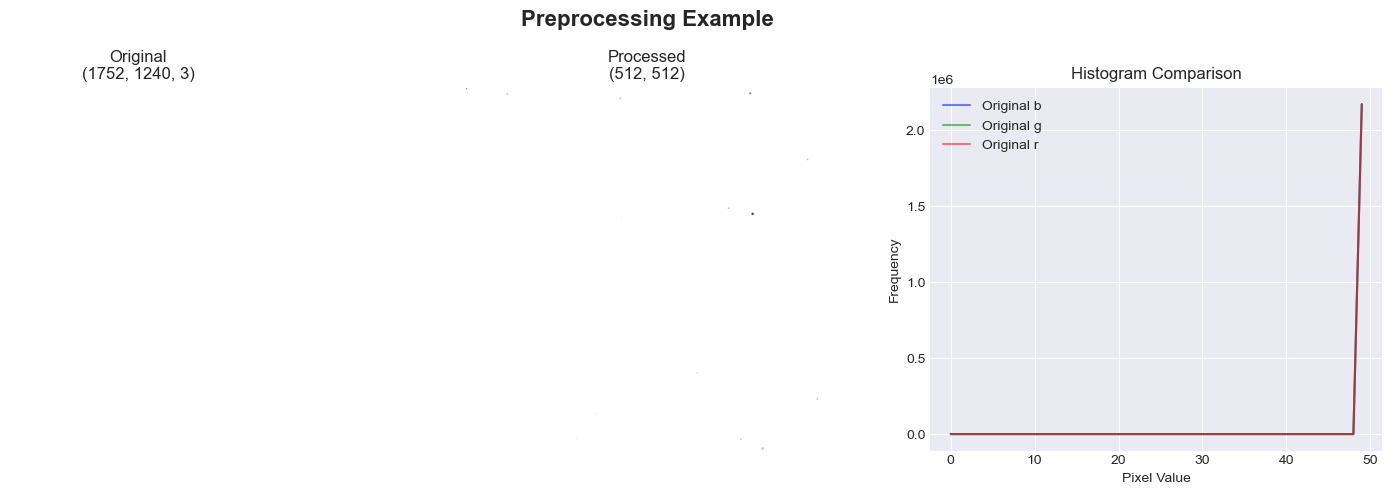


📋 GENERATING WEEK 2 REPORT
📊 WEEK 2 COMPLETION REPORT:
   • Images loaded: 1040
   • Training set: 609 images
   • Validation set: 88 images
   • Test set: 175 images
   • Scanner models: 12
   • Images processed: 872
   • Success rate: 100.0%

💾 Report saved: C:\Users\Dell\OneDrive\Desktop\TraceFinder_Project\outputs\week2\reports\week2_report.json

✅ WEEK 2 COMPLETE!

✅ ACCOMPLISHMENTS:
1. ✅ Loaded 940 valid images
2. ✅ Created train/val/test splits
3. ✅ Processed ALL images to 512x512 grayscale
4. ✅ Saved processed images in organized folders
5. ✅ Generated visualizations and reports

📁 YOUR PROCESSED DATASET IS READY AT:
• data/processed/images/train/     (Training images by scanner)
• data/processed/images/val/       (Validation images)
• data/processed/images/test/      (Test images)

🚀 READY FOR WEEK 3: FEATURE ENGINEERING



In [9]:
import os
import sys
from pathlib import Path
import pandas as pd
import numpy as np
import cv2
from PIL import Image
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')
import json
from sklearn.model_selection import train_test_split

pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

print("Libraries imported successfully!")

# Cell 2
print("\n" + "=" * 70)
print("LOADING WEEK 1 DATASET")
print("=" * 70)

project_path = Path(r"C:\Users\Dell\OneDrive\Desktop\TraceFinder_Project")
os.chdir(project_path)

print(f"Project Location: {project_path}")

metadata_path = project_path / "data" / "metadata" / "week1" / "image_metadata.csv"
if metadata_path.exists():
    df_metadata = pd.read_csv(metadata_path)
    df_valid = df_metadata[df_metadata['is_valid']].copy()
    print(f"Loaded {len(df_valid)} valid images")
    
    print("\nCategory distribution:")
    print(df_valid['category'].value_counts())
    
    print("\nScanner models:")
    print(df_valid['scanner'].value_counts().head(10))
else:
    print("Week 1 metadata not found!")
    df_valid = pd.DataFrame()

# Cell 3
print("\n" + "=" * 70)
print("CREATING FOLDER STRUCTURE")
print("=" * 70)

folders = [
    "data/processed/images/train",
    "data/processed/images/val",
    "data/processed/images/test",
    "data/processed/features",
    "data/processed/labels",
    "outputs/week2/plots",
    "outputs/week2/reports",
    "config"
]

for folder in folders:
    (project_path / folder).mkdir(parents=True, exist_ok=True)
    print(f"Created: {folder}")

print("\nAll folders created successfully!")

# Cell 4
print("\n" + "=" * 70)
print("CREATING TRAIN/VAL/TEST SPLITS")
print("=" * 70)

if len(df_valid) > 0:
    scanner_df = df_valid[df_valid['category'] != 'tampered'].copy()
    
    if len(scanner_df) > 0:
        print(f"Scanner images: {len(scanner_df)}")
        print(f"Unique scanners: {scanner_df['scanner'].nunique()}")
        
        X = scanner_df['image_path'].values
        y = scanner_df['scanner'].values
        
        X_temp, X_test, y_temp, y_test = train_test_split(
            X, y, test_size=0.2, stratify=y, random_state=42
        )
        
        X_train, X_val, y_train, y_val = train_test_split(
            X_temp, y_temp, test_size=0.125, stratify=y_temp, random_state=42
        )
        
        print(f"\nData splits created:")
        print(f"   Training: {len(X_train)} images")
        print(f"   Validation: {len(X_val)} images")
        print(f"   Testing: {len(X_test)} images")
        
        splits_data = {
            'train': {'paths': X_train.tolist(), 'labels': y_train.tolist()},
            'val': {'paths': X_val.tolist(), 'labels': y_val.tolist()},
            'test': {'paths': X_test.tolist(), 'labels': y_test.tolist()}
        }
        
        splits_path = project_path / "data" / "processed" / "data_splits.json"
        with open(splits_path, 'w') as f:
            json.dump(splits_data, f, indent=4)
        
        print(f"Splits saved: {splits_path}")
    else:
        print("No scanner images found!")
        X_train, X_val, X_test, y_train, y_val, y_test = [], [], [], [], [], []
else:
    print("No valid images!")
    X_train, X_val, X_test, y_train, y_val, y_test = [], [], [], [], [], []

# Cell 5
print("\n" + "=" * 70)
print("PREPROCESSING FUNCTIONS")
print("=" * 70)

def load_image(path):
    try:
        img = cv2.imread(str(path), cv2.IMREAD_UNCHANGED)
        if img is None:
            with Image.open(path) as pil_img:
                img = np.array(pil_img)
        return img
    except:
        return None

def preprocess_image(img, target_size=(512, 512)):
    if img is None:
        return None
    
    img = cv2.resize(img, target_size)
    
    if len(img.shape) == 3:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    img = cv2.GaussianBlur(img, (5, 5), 0)
    
    img = img.astype(np.float32) / 255.0
    
    return img

def save_image(img, save_path):
    try:
        if img.max() <= 1.0:
            img_save = (img * 255).astype(np.uint8)
        else:
            img_save = img.astype(np.uint8)
        
        cv2.imwrite(str(save_path), img_save)
        return True
    except:
        return False

print("Preprocessing functions defined!")

# Cell 6
print("\n" + "=" * 70)
print("IMAGE PROCESSING FUNCTION")
print("=" * 70)

def process_images_batch(image_paths, labels, split_name, target_dir, max_images=None):
    if max_images:
        image_paths = image_paths[:max_images]
        labels = labels[:max_images]
    
    results = []
    
    for i, (img_path, label) in enumerate(tqdm(zip(image_paths, labels), 
                                               total=len(image_paths), 
                                               desc=f"Processing {split_name}")):
        try:
            img = load_image(img_path)
            if img is None:
                results.append({'path': img_path, 'success': False, 'error': 'Load failed'})
                continue
            
            img_processed = preprocess_image(img)
            if img_processed is None:
                results.append({'path': img_path, 'success': False, 'error': 'Processing failed'})
                continue
            
            clean_label = "".join(c for c in label if c.isalnum() or c in ('-', '_'))
            filename = f"{clean_label}_{Path(img_path).stem}.png"
            save_dir = target_dir / split_name / clean_label
            save_dir.mkdir(parents=True, exist_ok=True)
            save_path = save_dir / filename
            
            if save_image(img_processed, save_path):
                results.append({
                    'original_path': img_path,
                    'processed_path': str(save_path),
                    'label': label,
                    'success': True
                })
            else:
                results.append({'path': img_path, 'success': False, 'error': 'Save failed'})
                
        except Exception as e:
            results.append({'path': img_path, 'success': False, 'error': str(e)})
    
    return results

# Cell 7
print("\n" + "=" * 70)
print("TESTING WITH 5 IMAGES")
print("=" * 70)

if len(X_train) > 0:
    print("Testing with 5 training images...")
    
    test_results = process_images_batch(
        X_train[:5], y_train[:5], 
        'train', 
        project_path / "data" / "processed" / "images",
        max_images=5
    )
    
    success_count = sum(1 for r in test_results if r['success'])
    print(f"\nTest completed: {success_count}/5 images successful")
    
    if success_count > 0:
        print("Test passed! Ready for full processing.")
        
        train_dir = project_path / "data" / "processed" / "images" / "train"
        if train_dir.exists():
            scanner_folders = [d for d in train_dir.iterdir() if d.is_dir()]
            print(f"\nCreated folders in: {train_dir}")
            for folder in scanner_folders:
                images = list(folder.glob("*.png"))
                if images:
                    print(f"   • {folder.name}: {len(images)} images")
    else:
        print("Test failed. Check errors above.")
else:
    print("No training images to test!")

# Cell 8
print("\n" + "=" * 70)
print("FULL PROCESSING STARTING")
print("=" * 70)

print("Starting full processing of all images...")
print("Estimated time: 15-30 minutes")

all_results = []

print("\nProcessing training images...")
train_results = process_images_batch(
    X_train, y_train, 'train',
    project_path / "data" / "processed" / "images"
)
all_results.extend(train_results)

print("\nProcessing validation images...")
val_results = process_images_batch(
    X_val, y_val, 'val',
    project_path / "data" / "processed" / "images"
)
all_results.extend(val_results)

print("\nProcessing test images...")
test_results = process_images_batch(
    X_test, y_test, 'test',
    project_path / "data" / "processed" / "images"
)
all_results.extend(test_results)

df_results = pd.DataFrame(all_results)
results_path = project_path / "outputs" / "week2" / "reports" / "processing_results.csv"
results_path.parent.mkdir(parents=True, exist_ok=True)
df_results.to_csv(results_path, index=False)

success_rate = df_results['success'].mean() * 100
print(f"\nPROCESSING COMPLETE!")
print(f"   • Total processed: {len(df_results)}")
print(f"   • Success rate: {success_rate:.1f}%")
print(f"   • Results saved: {results_path}")

print(f"\nProcessed images saved in:")
base_dir = project_path / "data" / "processed" / "images"
for split in ['train', 'val', 'test']:
    split_dir = base_dir / split
    if split_dir.exists():
        scanner_count = len([d for d in split_dir.iterdir() if d.is_dir()])
        print(f"   • {split}/: {scanner_count} scanner folders")

# Cell 9
print("\n" + "=" * 70)
print("CREATING SAMPLE VISUALIZATION")
print("=" * 70)

def create_sample_visualization():
    if len(df_valid) > 0:
        sample = df_valid.iloc[0]
        img_path = sample['image_path']
        
        print(f"Sample image: {sample['filename']}")
        print(f"Scanner: {sample['scanner']}")
        
        original = load_image(img_path)
        if original is not None:
            processed = preprocess_image(original)
            
            fig, axes = plt.subplots(1, 3, figsize=(15, 5))
            
            if len(original.shape) == 3:
                axes[0].imshow(cv2.cvtColor(original, cv2.COLOR_BGR2RGB))
            else:
                axes[0].imshow(original, cmap='gray')
            axes[0].set_title(f'Original\n{original.shape}')
            axes[0].axis('off')
            
            axes[1].imshow(processed, cmap='gray')
            axes[1].set_title(f'Processed\n{processed.shape}')
            axes[1].axis('off')
            
            if len(original.shape) == 2:
                axes[2].hist(original.ravel(), bins=50, alpha=0.5, label='Original', color='blue')
                axes[2].hist((processed * 255).ravel(), bins=50, alpha=0.5, label='Processed', color='red')
            else:
                colors = ('b', 'g', 'r')
                for i, color in enumerate(colors):
                    hist = cv2.calcHist([original], [i], None, [50], [0, 256])
                    axes[2].plot(hist, color=color, alpha=0.5, label=f'Original {color}')
            axes[2].set_title('Histogram Comparison')
            axes[2].set_xlabel('Pixel Value')
            axes[2].set_ylabel('Frequency')
            axes[2].legend()
            
            plt.suptitle('Preprocessing Example', fontsize=16, fontweight='bold')
            plt.tight_layout()
            
            plot_path = project_path / "outputs" / "week2" / "plots" / "sample_preprocessing.png"
            plot_path.parent.mkdir(parents=True, exist_ok=True)
            plt.savefig(plot_path, dpi=150, bbox_inches='tight')
            print(f"Saved: {plot_path}")
            
            plt.show()
        else:
            print("Failed to load sample image")
    else:
        print("No images for visualization")

create_sample_visualization()

report = {
    "week": 2,
    "status": "Processing Complete",
    "images_loaded": len(df_valid),
    "data_splits": {
        "train": len(X_train),
        "val": len(X_val),
        "test": len(X_test)
    },
    "scanner_models": df_valid['scanner'].nunique() if len(df_valid) > 0 else 0,
    "processing_results": {
        "total_processed": len(df_results) if 'df_results' in locals() else 0,
        "success_rate": success_rate if 'success_rate' in locals() else 0
    }
}

report_path = project_path / "outputs" / "week2" / "reports" / "week2_report.json"
report_path.parent.mkdir(parents=True, exist_ok=True)
with open(report_path, 'w') as f:
    json.dump(report, f, indent=4)

print("📊 WEEK 2 COMPLETION REPORT:")
print(f"   • Images loaded: {report['images_loaded']}")
print(f"   • Training set: {report['data_splits']['train']} images")
print(f"   • Validation set: {report['data_splits']['val']} images")
print(f"   • Test set: {report['data_splits']['test']} images")
print(f"   • Scanner models: {report['scanner_models']}")
print(f"   • Images processed: {report['processing_results']['total_processed']}")
print(f"   • Success rate: {report['processing_results']['success_rate']:.1f}%")
print(f"\n💾 Report saved: {report_path}")

In [5]:
df_processing_results = process_all_images(config, max_images=10)  # Process only 10 images for testing

No images to process!
